In [23]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [41]:
def extract_sample(patient_path):
    patient_dataframe = pd.read_csv(patient_path, sep='|')
    if len(patient_dataframe[patient_dataframe.SepsisLabel == 1]) == 0:
        label = 0
    else:
        label = 1
        label_row = patient_dataframe[patient_dataframe.SepsisLabel == 1].index[0]
        patient_dataframe = patient_dataframe.iloc[:label_row + 1]

    # patient_dataframe = patient_dataframe.fillna(patient_dataframe.mean(numeric_only=True).round(1),inplace=False)
    # patient_dataframe = patient_dataframe.fillna(0, inplace=False)
    patient_dataframe = patient_dataframe.drop(columns=['SepsisLabel'], inplace=False)
    return patient_dataframe, label


In [21]:
def calc_class_balance(ds_path):
    files_paths = glob(f'{ds_path}/**.psv')
    zero_counter = 0
    one_counter = 0
    for sample_path in files_paths:
        sample_df, sample_label = extract_sample(sample_path)
        if sample_label == 0:
            zero_counter+=1
        else:
            one_counter+=1

    zero_class_percentage = zero_counter / (zero_counter+one_counter)
    one_class_percentage = one_counter / (zero_counter+one_counter)
    return zero_class_percentage, one_class_percentage

In [36]:
def plot_class_percentages(*numbers):
    assert len(numbers) == 2, 'Please provide two classes'
    # Define the labels for x-axis
    labels = ['Class 1', 'Class 2']

    # Create a bar chart
    plt.bar(labels, numbers)

    # Add a title to the chart
    plt.title('Class balance')

    # Add labels to the axes
    plt.xlabel('Classes')
    plt.ylabel('Percentage')

    # Add numbers above the bars
    for i in range(len(numbers)):
        plt.text(i, numbers[i], numbers[i], ha='center')

    # Show the chart
    plt.show()


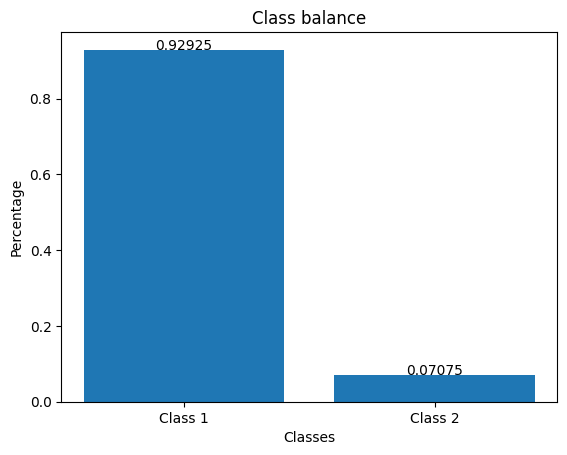

In [40]:
train_path = 'original_data/train'
train_zero_class_per, train_one_class_per = calc_class_balance(train_path)
plot_class_percentages(train_zero_class_per, train_one_class_per)

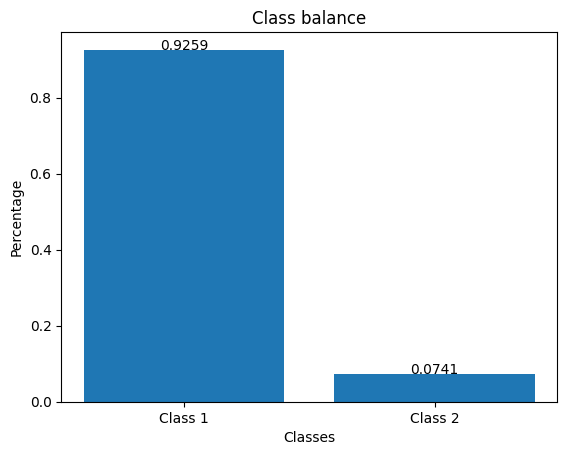

In [38]:
test_path = 'original_data/test'
test_zero_class_per, test_one_class_per = calc_class_balance(test_path)
plot_class_percentages(test_zero_class_per, test_one_class_per)

In [54]:

def calc_nulls_percentage(ds_path):
    files_paths = glob(f'{ds_path}/**.psv')
    zero_counter = 0
    one_counter = 0
    for idx, sample_path in enumerate(files_paths):
        if idx == 10:
            break
        sample_df, sample_label = extract_sample(sample_path)
        if sample_label == 0:
            zero_counter+=1
        else:
            one_counter+=1
        if idx == 0:
            total_df = sample_df
        else:
            total_df = pd.concat([total_df, sample_df], axis=0)

        print(sample_df.isnull().sum() * 100 / len(sample_df))



In [56]:
calc_nulls_percentage(train_path)
calc_nulls_percentage(test_path)

HR                   15.384615
O2Sat                11.538462
Temp                 76.923077
SBP                  30.769231
MAP                  15.384615
DBP                  30.769231
Resp                 11.538462
EtCO2               100.000000
BaseExcess          100.000000
HCO3                 84.615385
FiO2                100.000000
pH                   92.307692
PaCO2               100.000000
SaO2                100.000000
AST                 100.000000
BUN                  84.615385
Alkalinephos        100.000000
Calcium              92.307692
Chloride             84.615385
Creatinine           92.307692
Bilirubin_direct    100.000000
Glucose              92.307692
Lactate              92.307692
Magnesium            84.615385
Phosphate            92.307692
Potassium            84.615385
Bilirubin_total     100.000000
TroponinI           100.000000
Hct                  69.230769
Hgb                  92.307692
PTT                  92.307692
WBC                  92.307692
Fibrinog